In [41]:
!pip3 install tensorflow-gpu==2.0.0-rc0 

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import pickle
import os

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [47]:
!pip install wget

In [0]:
import wget

In [49]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [50]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
wget.download(link)

'traffic-signs-data.zip'

In [0]:
data = "./"

In [0]:
!unzip -q traffic-signs-data.zip -d $data

In [0]:
train_data = data + "/train.p"
valid_data = data + "/valid.p"
test_data  = data + "/test.p"

In [0]:
with open(train_data, mode = "rb") as f:
    train = pickle.load(f)

In [0]:
with open(valid_data, mode = "rb") as f:
    valid = pickle.load(f)

In [0]:
with open(test_data, mode = "rb") as f:
    test = pickle.load(f)

In [0]:
from sklearn.utils import shuffle

In [0]:
train_X = train["features"]
train_Y = train["labels"]
train_X, train_Y = shuffle(train_X, train_Y)

In [0]:
valid_X = valid["features"]
valid_Y = valid["labels"]
valid_X, valid_Y = shuffle(valid_X, valid_Y)

In [0]:
test_X = test["features"]
test_Y = test["labels"]

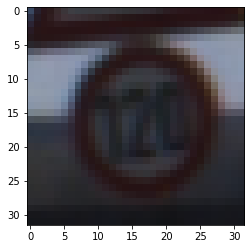

In [61]:
plt.imshow(train_X[0])

In [0]:
classNames = ['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing by vehicles over 3.5 metric tons']

In [63]:
classNames[test_Y[0]]

'Vehicles over 3.5 metric tons prohibited'

In [0]:
train_X = train_X.astype("float") / 255.0
valid_X = valid_X.astype("float") / 255.0
test_X = test_X.astype("float") / 255.0

In [0]:
lb = LabelBinarizer()

In [0]:
train_Y = lb.fit_transform(train_Y)
test_Y = lb.fit_transform(test_Y)
valid_Y = lb.fit_transform(valid_Y)

In [0]:
model = Sequential()

In [0]:
learning_rate = 0.01
batch_size = 64
num_epochs = 30

In [0]:
width = 32
height = 32
classes = 43

In [0]:
shape = (width, height, 3)

In [0]:
model.add(Conv2D(32, (3,3), padding="same", input_shape = shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [0]:
model.add(Activation("softmax"))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
aug = ImageDataGenerator(rotation_range=0.19, zoom_range=0.15, width_shift_range=0.2,
                         height_shift_range = 0.2, shear_range = 0.2, horizontal_flip = True, fill_mode = "nearest")

In [0]:
opt = SGD(learning_rate = learning_rate, momentum=0.9, decay = learning_rate / num_epochs)

In [0]:
model.compile(loss = "categorical_crossentropy", optimizer=opt, metrics = ["accuracy"])

In [79]:
print("Start training.............")
H = model.fit_generator(aug.flow(train_X, train_Y, batch_size=batch_size), validation_data=(valid_X, valid_Y),
                        steps_per_epoch = train_X.shape[0] // batch_size, epochs = num_epochs, verbose = 1)

Start training.............
Epoch 1/30
543/543 [==============================] - 47s 86ms/step - loss: 2.7503 - accuracy: 0.2837 - val_loss: 2.6067 - val_accuracy: 0.2766
Epoch 2/30
543/543 [==============================] - 45s 83ms/step - loss: 1.3245 - accuracy: 0.5757 - val_loss: 1.4070 - val_accuracy: 0.5735
Epoch 3/30
543/543 [==============================] - 46s 85ms/step - loss: 0.7834 - accuracy: 0.7386 - val_loss: 0.8923 - val_accuracy: 0.7365
Epoch 4/30
543/543 [==============================] - 45s 83ms/step - loss: 0.4789 - accuracy: 0.8382 - val_loss: 0.6540 - val_accuracy: 0.7930
Epoch 5/30
543/543 [==============================] - 46s 84ms/step - loss: 0.3288 - accuracy: 0.8901 - val_loss: 0.7799 - val_accuracy: 0.7800
Epoch 6/30
543/543 [==============================] - 46s 84ms/step - loss: 0.2352 - accuracy: 0.9226 - val_loss: 0.4689 - val_accuracy: 0.8664
Epoch 7/30
543/543 [==============================] - 46s 84ms/step - loss: 0.1878 - accuracy: 0.9386 - val_

In [0]:
model.save('trafficSignsClassification.h5')

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.load_model("trafficSignsClassification.h5")

In [0]:
result = model.predict(np.array(test_X[130:131]))

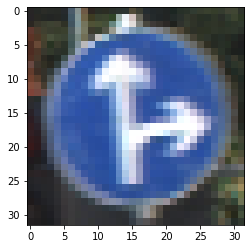

In [94]:
plt.imshow(test_X[130])

In [0]:
predict_label = np.argmax(result)

In [96]:
classNames[predict_label]

'Go straight or right'